In [1]:
# What version of Python do you have?
import sys
import os
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import re
import mne
import pathlib
import openpyxl
from datetime import datetime
import pytz
import random
import os
from scipy import signal
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Sequential
import matplotlib
from matplotlib import pyplot as plt
from scipy import signal
import gc
import matplotlib.colors as colors
plt.rcParams['axes.facecolor']='white'



print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.7.0
Keras Version: 2.7.0

Python 3.9.7 (default, Sep 16 2021, 23:53:23) 
[Clang 12.0.0 ]
Pandas 1.3.4
Scikit-Learn 1.0.1
GPU is available


In [2]:
sys.path.append("/Users/niklashjort/Desktop/Notes/Speciale/projects/DataHandling/Køge/filter_edf_proj/")
sys.path.append("/Volumes")
sys.path.append("/Users/niklashjort/Desktop/Notes/Speciale/projects/DataHandling/Køge/filter_edf_proj/")
sys.path.append("/Users/niklashjort/Desktop/Notes/Speciale/projects/DataHandling/Køge/")
from spectrogram_proj.spectrogram import nanpow2db
from pandas_helper import read_edf_file
from filter import apply_filter

df, info = read_edf_file("/Volumes/NHR HDD/CHB-MIT/Filtered-chb-mit/chb01/chb01_14.edf")



In [3]:
df.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-0.0001420269,-0.0000201221,0.0000087912,-0.0000470818,-0.0000990476,-0.0000552869,0.0000877167,-0.0001338217,-0.0001197558,-0.0000435653,...,-0.0000412210,-0.0000138706,0.0001076435,-0.0000552869,0.0000494261,-0.0000084005,-0.0000330159,-0.0000349695,0.0000541148,-0.0000138706
1,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,...,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954
2,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,...,0.0000001954,0.0000001954,-0.0000009768,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954
3,0.0000005861,0.0000001954,0.0000001954,0.0000001954,0.0000005861,0.0000001954,0.0000013675,-0.0000009768,0.0000001954,0.0000001954,...,0.0000001954,0.0000001954,-0.0000005861,0.0000001954,0.0000001954,0.0000001954,0.0000005861,0.0000001954,-0.0000001954,0.0000001954
4,0.0000001954,0.0000001954,0.0000001954,0.0000001954,-0.0000001954,0.0000001954,0.0000017582,-0.0000013675,-0.0000005861,0.0000001954,...,-0.0000005861,0.0000001954,0.0000115263,0.0000001954,0.0000005861,0.0000001954,0.0000005861,-0.0000001954,-0.0000001954,0.0000001954


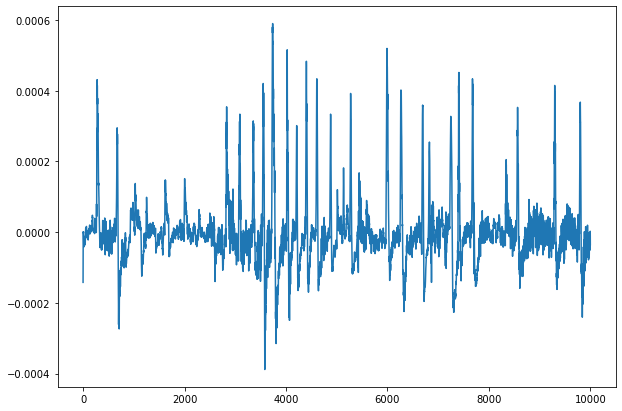

In [4]:
plt.figure(figsize=(10,7), facecolor='w')
plt.plot(df["FP1-F7"][0:10000])


In [5]:
filtered = apply_filter(df["FP1-F7"], 256)
filtered[0:5]

array([-1.91084682e-06,  7.63470916e-05,  6.76957014e-05,  7.01981735e-05,
        5.39247852e-05])

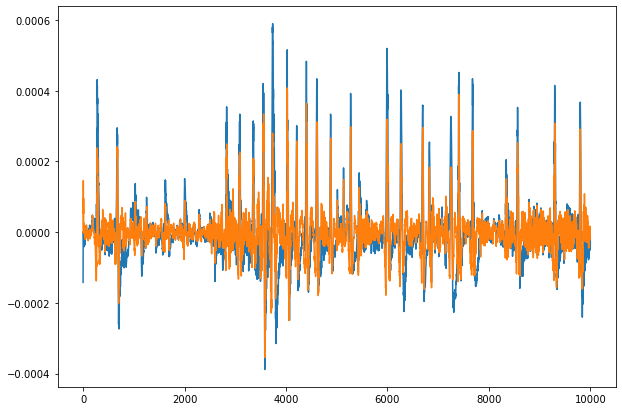

In [6]:
plt.figure(figsize=(10,7), facecolor='w')
plt.plot(df["FP1-F7"][0:10000])
plt.plot(filtered[0:10000])

In [7]:
df.dtypes

FP1-F7      float64
F7-T7       float64
T7-P7       float64
P7-O1       float64
FP1-F3      float64
F3-C3       float64
C3-P3       float64
P3-O1       float64
FP2-F4      float64
F4-C4       float64
C4-P4       float64
P4-O2       float64
FP2-F8      float64
F8-T8       float64
T8-P8-0     float64
P8-O2       float64
FZ-CZ       float64
CZ-PZ       float64
P7-T7       float64
T7-FT9      float64
FT9-FT10    float64
FT10-T8     float64
T8-P8-1     float64
dtype: object

In [8]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-07 00:44:37 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
>

In [9]:
def nanpow2db(y):
    if isinstance(y, int) or isinstance(y, float):
        if y == 0:
            return np.nan
        else:
            ydB = 10 * np.log10(y)
    else:
        if isinstance(y, list):  # if list, turn into array
            y = np.asarray(y)
        y = y.astype(float)  # make sure it's a float array so we can put nans in it
        y[y == 0] = np.nan
        ydB = 10 * np.log10(y)

    return ydB

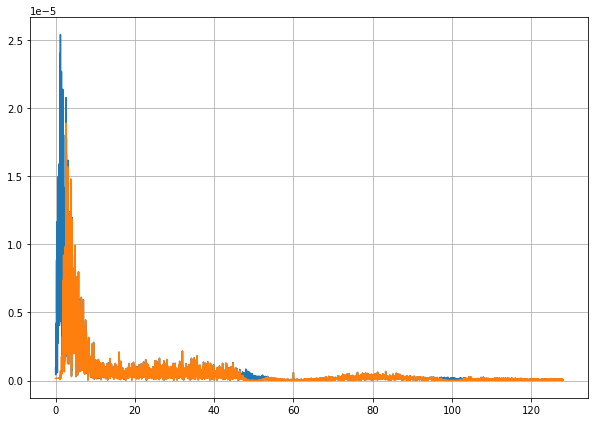

In [10]:
from scipy.fft import fft, fftfreq
plt.figure(figsize=(10,7), facecolor='w')
N = len(df["FP1-F7"][0:10000])
sig = np.array(df["FP1-F7"][0:10000])
f_sig = filtered[0:10000]

yf = fft(sig)
xf = fftfreq(N, 1.0/256)[:N//2]

yf2 = fft(f_sig)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf2[0:N//2]))
plt.grid()
plt.show()

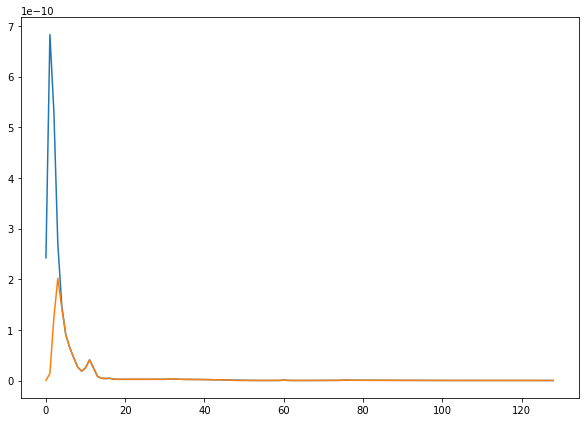

In [11]:
noverlap = 256 / 2
plt.figure(figsize=(10,7), facecolor='w')
f, Pxx_den = signal.welch(df["FP1-F7"], fs=256, window='hanning', detrend=False, )
f, f_Pxx_den = signal.welch(filtered, fs=256, window='hanning', detrend=False)
plt.plot(f, Pxx_den)
plt.plot(f, f_Pxx_den)

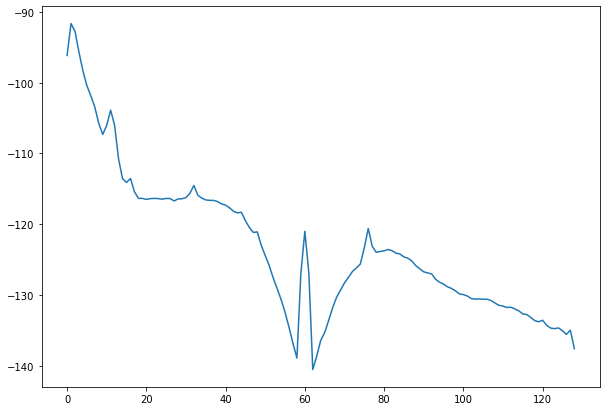

In [12]:
Pxx_den_db = 10*np.log10(Pxx_den)
f_Pxx_den_db = 10*np.log10(f_Pxx_den)
plt.figure(figsize=(10,7), facecolor='w')
plt.plot(f, Pxx_den_db)


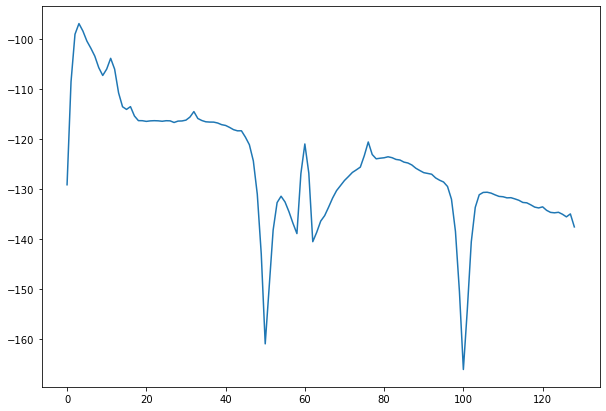

In [13]:
plt.figure(figsize=(10,7), facecolor='w')
plt.plot(f, f_Pxx_den_db)

In [14]:
mask = (f < 120)
f2 = f[mask]
pxx2 = f_Pxx_den_db[mask]

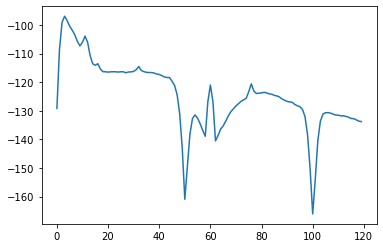

In [15]:
plt.plot(f2, pxx2)

In [16]:
mn = np.min(Pxx_den_db)
mn

-140.51852532362534

In [17]:
mx = np.max(Pxx_den_db)
mx

-91.65698411282305

In [18]:
f_mn = np.min(f_Pxx_den_db)
f_mx = np.max(f_Pxx_den_db)
print(f_mn)
print(f_mx)

-166.05493949953177
-96.94802761090627


In [19]:
f_mn = np.min(pxx2)
f_mx = np.max(pxx2)
print(f_mn)
print(f_mx)

-166.05493949953177
-96.94802761090627


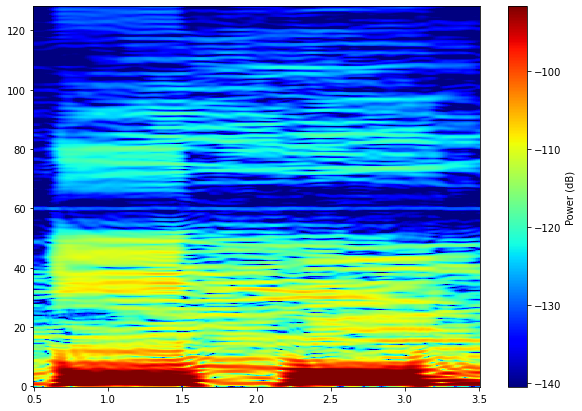

In [20]:
plt.figure(figsize=(10,7), facecolor='w')
f, t, Sxx = signal.spectrogram(np.array(df["FP1-F7"][0:1024]), fs=256, nperseg=256, noverlap=int(256*0.99), nfft=1024,scaling='density', return_onesided=True)

normalize_color= matplotlib.colors.Normalize(vmin=mn, vmax=mx)
Sxx = 10*np.log10(Sxx)
plt.pcolormesh(t, f, Sxx, cmap='jet', norm=normalize_color)# Plot the result
plt.colorbar(label='Power (dB)')

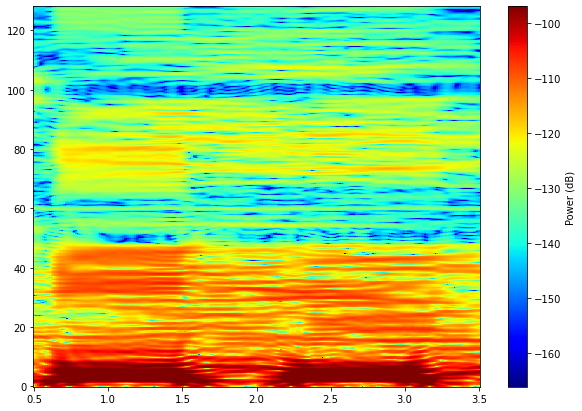

In [21]:
plt.figure(figsize=(10,7), facecolor='w')
f, t, Sxx = signal.spectrogram(np.array(filtered[0:1024]), fs=256, nperseg=256, noverlap=int(256*0.99), nfft=1024,scaling='density', return_onesided=True)

normalize_color= matplotlib.colors.Normalize(vmin=f_mn, vmax=f_mx)
Sxx = 10*np.log10(Sxx)
plt.pcolormesh(t, f, Sxx, cmap='jet', norm=normalize_color)# Plot the result
plt.colorbar(label='Power (dB)')

In [22]:
print(df['FP1-F7'][0:20])
df.head()

0    -0.0001420269
1     0.0000001954
2     0.0000001954
3     0.0000005861
4     0.0000001954
5    -0.0000021490
6    -0.0000021490
7     0.0000001954
8     0.0000013675
9    -0.0000005861
10   -0.0000080098
11   -0.0000259829
12   -0.0000353602
13   -0.0000412210
14   -0.0000412210
15   -0.0000380952
16   -0.0000369231
17   -0.0000384860
18   -0.0000361416
19   -0.0000373138
Name: FP1-F7, dtype: float64


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-0.0001420269,-0.0000201221,0.0000087912,-0.0000470818,-0.0000990476,-0.0000552869,0.0000877167,-0.0001338217,-0.0001197558,-0.0000435653,...,-0.0000412210,-0.0000138706,0.0001076435,-0.0000552869,0.0000494261,-0.0000084005,-0.0000330159,-0.0000349695,0.0000541148,-0.0000138706
1,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,...,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954
2,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,...,0.0000001954,0.0000001954,-0.0000009768,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954
3,0.0000005861,0.0000001954,0.0000001954,0.0000001954,0.0000005861,0.0000001954,0.0000013675,-0.0000009768,0.0000001954,0.0000001954,...,0.0000001954,0.0000001954,-0.0000005861,0.0000001954,0.0000001954,0.0000001954,0.0000005861,0.0000001954,-0.0000001954,0.0000001954
4,0.0000001954,0.0000001954,0.0000001954,0.0000001954,-0.0000001954,0.0000001954,0.0000017582,-0.0000013675,-0.0000005861,0.0000001954,...,-0.0000005861,0.0000001954,0.0000115263,0.0000001954,0.0000005861,0.0000001954,0.0000005861,-0.0000001954,-0.0000001954,0.0000001954


In [23]:
new_df = df.copy()
new_df.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-0.0001420269,-0.0000201221,0.0000087912,-0.0000470818,-0.0000990476,-0.0000552869,0.0000877167,-0.0001338217,-0.0001197558,-0.0000435653,...,-0.0000412210,-0.0000138706,0.0001076435,-0.0000552869,0.0000494261,-0.0000084005,-0.0000330159,-0.0000349695,0.0000541148,-0.0000138706
1,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,...,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954
2,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,...,0.0000001954,0.0000001954,-0.0000009768,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954
3,0.0000005861,0.0000001954,0.0000001954,0.0000001954,0.0000005861,0.0000001954,0.0000013675,-0.0000009768,0.0000001954,0.0000001954,...,0.0000001954,0.0000001954,-0.0000005861,0.0000001954,0.0000001954,0.0000001954,0.0000005861,0.0000001954,-0.0000001954,0.0000001954
4,0.0000001954,0.0000001954,0.0000001954,0.0000001954,-0.0000001954,0.0000001954,0.0000017582,-0.0000013675,-0.0000005861,0.0000001954,...,-0.0000005861,0.0000001954,0.0000115263,0.0000001954,0.0000005861,0.0000001954,0.0000005861,-0.0000001954,-0.0000001954,0.0000001954


In [24]:
new_df.dtypes

FP1-F7      float64
F7-T7       float64
T7-P7       float64
P7-O1       float64
FP1-F3      float64
F3-C3       float64
C3-P3       float64
P3-O1       float64
FP2-F4      float64
F4-C4       float64
C4-P4       float64
P4-O2       float64
FP2-F8      float64
F8-T8       float64
T8-P8-0     float64
P8-O2       float64
FZ-CZ       float64
CZ-PZ       float64
P7-T7       float64
T7-FT9      float64
FT9-FT10    float64
FT10-T8     float64
T8-P8-1     float64
dtype: object

In [25]:
pd.set_option("display.precision", 10)
new_df["FP1-F7"] = apply_filter(df["FP1-F7"], 256)
new_df.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-0.0000019108,-0.0000201221,0.0000087912,-0.0000470818,-0.0000990476,-0.0000552869,0.0000877167,-0.0001338217,-0.0001197558,-0.0000435653,...,-0.0000412210,-0.0000138706,0.0001076435,-0.0000552869,0.0000494261,-0.0000084005,-0.0000330159,-0.0000349695,0.0000541148,-0.0000138706
1,0.0000763471,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,...,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954
2,0.0000676957,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,...,0.0000001954,0.0000001954,-0.0000009768,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954,0.0000001954
3,0.0000701982,0.0000001954,0.0000001954,0.0000001954,0.0000005861,0.0000001954,0.0000013675,-0.0000009768,0.0000001954,0.0000001954,...,0.0000001954,0.0000001954,-0.0000005861,0.0000001954,0.0000001954,0.0000001954,0.0000005861,0.0000001954,-0.0000001954,0.0000001954
4,0.0000539248,0.0000001954,0.0000001954,0.0000001954,-0.0000001954,0.0000001954,0.0000017582,-0.0000013675,-0.0000005861,0.0000001954,...,-0.0000005861,0.0000001954,0.0000115263,0.0000001954,0.0000005861,0.0000001954,0.0000005861,-0.0000001954,-0.0000001954,0.0000001954


In [26]:
filtered[0:5]

array([-1.91084682e-06,  7.63470916e-05,  6.76957014e-05,  7.01981735e-05,
        5.39247852e-05])

In [27]:
type(filtered)

numpy.ndarray

In [28]:
filtered.dtype

dtype('float64')

In [29]:
new_df["FP1-F7"][0:5]

0   -0.0000019108
1    0.0000763471
2    0.0000676957
3    0.0000701982
4    0.0000539248
Name: FP1-F7, dtype: float64

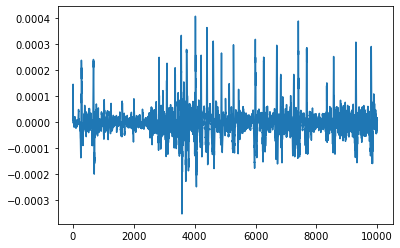

In [30]:
plt.plot(new_df["FP1-F7"][0:10000])

In [31]:
df_køge = pd.read_csv("/Users/niklashjort/Desktop/Notes/Speciale/projects/Dataset/EMU_monitor(ruc)/NHR/EEG/Seizure/Seizure_0_patient_4_date_2019-05-21 1556430000.csv")

In [32]:
df_køge.head()

,Unnamed: 0,CH-1,CH-2,timestamp,class
0,19501001,-0.0000025130,0.0000026771,1558486005002.0,1.0
1,19501002,0.0000013613,0.0000019734,1558486005004.0,1.0
2,19501003,-0.0000016137,0.0000023932,1558486005006.0,1.0
3,19501004,0.0000015210,0.0000011726,1558486005008.0,1.0
4,19501005,-0.0000007116,-0.0000003129,1558486005010.0,1.0


In [33]:
np.min(df_køge['CH-1'])

-7.277607527414658e-06

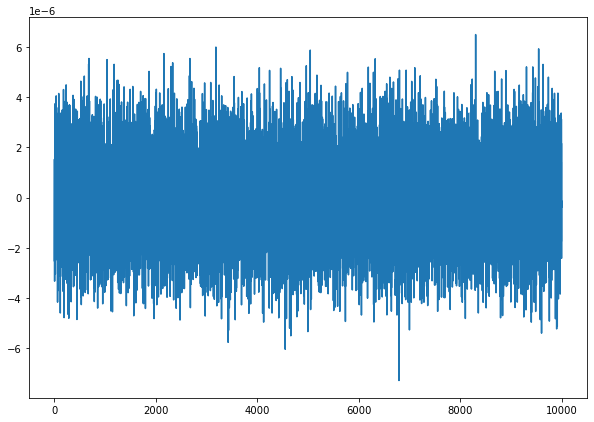

In [34]:
plt.figure(figsize=(10,7), facecolor='w')
plt.plot(df_køge['CH-1'][0:10000])

In [35]:

# seg = df_køge['CH-1'][x: x+2000]
# plt.figure(figsize=(10,7), facecolor='w')
# f, t, Sxx = signal.spectrogram(np.array(df_køge['CH-1'][0: 2000]), fs=500, nperseg=500, noverlap=int(500*0.99), nfft=1024, scaling='density', return_onesided=True)
# mn = -141.46261350815902 
# mx = -84.61146080687881 
# normalize_color= matplotlib.colors.Normalize(vmin=mn, vmax=mx)
# Sxx = 10*np.log10(Sxx)
# plt.pcolormesh(t, f, Sxx, cmap='jet', norm=normalize_color)# Plot the result
# plt.colorbar(label='Power (dB)')

In [36]:
df, info = read_edf_file("/Users/niklashjort/Desktop/Notes/Speciale/projects/Dataset/EMU_monitor(ruc)/EEG/Patient 4/20190521155643_p4Nat2.sdeeg_converted_.easy_filtered.edf")
sz_df = pd.read_csv("/Users/niklashjort/Desktop/Notes/Speciale/projects/Dataset/EMU_monitor(ruc)/NHR/EEG/Seizure/Seizure_0_patient_4_date_2019-05-21 1556430000.csv")

In [37]:
df.head()

,CH-1,CH-2,CH-3,CH-4,CH-5,CH-6,CH-7,CH-8,x,y,z
0,0.0000173344,0.0000575041,0.0011712624,0.0011810323,-0.0000454918,-0.0000507192,-0.0000649163,0.0000084786,0.0000000861,0.0000000307,0.000000048
1,0.0000109472,0.0000525385,0.0011702439,0.0011799089,-0.0000514403,-0.0000569687,-0.0000702399,0.0000033655,0.0000000861,0.0000000307,0.000000048
2,0.0000364960,0.0000786082,0.0011692254,0.0011799089,-0.0000259467,-0.0000319708,-0.0000445089,0.0000289312,0.0000000861,0.0000000307,0.000000048
3,0.0000375605,0.0000786082,0.0011682069,0.0011787856,-0.0000250969,-0.0000319708,-0.0000445089,0.0000289312,0.0000000861,0.0000000307,0.000000048
4,0.0000641739,0.0001046779,0.0011671883,0.0011776622,0.0000029459,-0.0000051873,-0.0000170033,0.0000562012,0.0000000861,0.0000000307,0.000000048


In [38]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: CH-1, CH-2, CH-3, CH-4, CH-5, CH-6, CH-7, CH-8, x, y, z
 chs: 11 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2019-05-21 15:56:43 UTC
 nchan: 11
 projs: []
 sfreq: 500.0 Hz
>

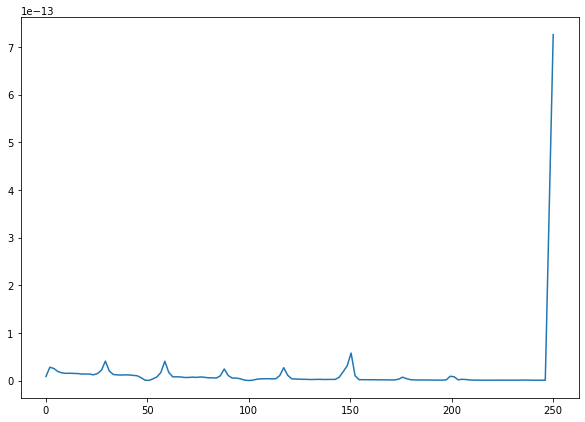

In [87]:
noverlap = 500 / 2
plt.figure(figsize=(10,7), facecolor='w')
f, Pxx_den = signal.welch(sz_df["CH-1"][0:100000], fs=500, window='hanning', detrend=False)
#f, f_Pxx_den = signal.welch(filtered, fs=500, window='hanning', detrend=False)
plt.plot(f, Pxx_den)
#plt.plot(f, f_Pxx_den)

In [83]:
filtered = apply_filter(sz_df["CH-1"][0:100000], 500, low=True)

In [71]:
from mne.time_frequency import psd_array_multitaper

psd, freqs = psd_array_multitaper(filtered, 500, adaptive=True,
                                          normalization='full', verbose=0)

In [72]:
psd_mt = 10 * np.log10(psd)

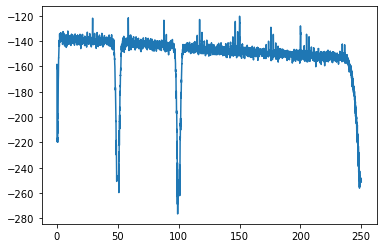

In [73]:
plt.plot(freqs, psd_mt)

In [74]:
np.min(psd_mt)

-276.4548102230576

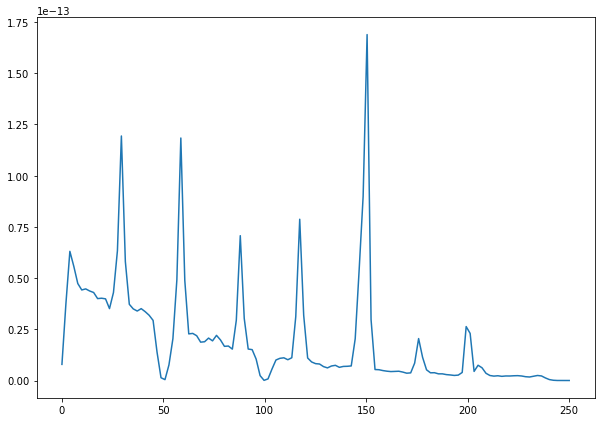

In [84]:
plt.figure(figsize=(10,7), facecolor='w')
f, f_Pxx_den = signal.welch(filtered, fs=500, window='hanning', scaling='spectrum')
plt.plot(f, f_Pxx_den)

In [85]:
f_Pxx_den

array([7.86900503e-15, 3.73872438e-14, 6.30308552e-14, 5.56735323e-14,
       4.73203368e-14, 4.41880721e-14, 4.47008744e-14, 4.36836385e-14,
       4.29464174e-14, 3.99740004e-14, 4.01520628e-14, 3.98551071e-14,
       3.50847540e-14, 4.29325452e-14, 6.33071474e-14, 1.19325176e-13,
       5.80623793e-14, 3.71880618e-14, 3.49358576e-14, 3.39014233e-14,
       3.50713820e-14, 3.36001652e-14, 3.18465952e-14, 2.93319964e-14,
       1.37912857e-14, 1.35291118e-15, 4.25809885e-16, 7.60025874e-15,
       2.04199348e-14, 4.91532442e-14, 1.18338778e-13, 4.88534169e-14,
       2.27478283e-14, 2.29837050e-14, 2.18548105e-14, 1.87108055e-14,
       1.89208629e-14, 2.07024496e-14, 1.93479013e-14, 2.20275142e-14,
       1.98065784e-14, 1.66757230e-14, 1.68165333e-14, 1.53143820e-14,
       2.94124373e-14, 7.06771749e-14, 3.02921286e-14, 1.53520895e-14,
       1.50583275e-14, 1.04589405e-14, 2.37896780e-15, 7.58185581e-17,
       7.87909834e-16, 5.57823498e-15, 1.00023951e-14, 1.08218133e-14,
      

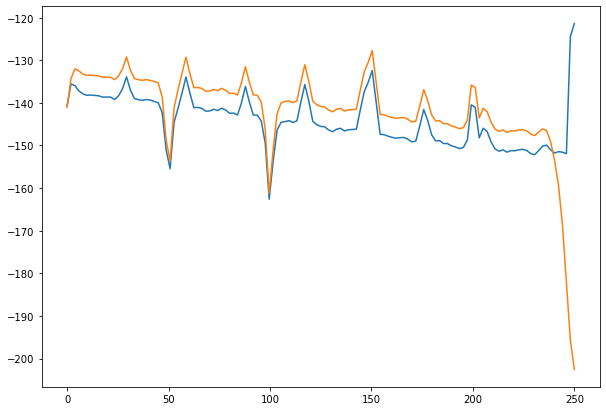

In [88]:
Pxx_den_db = nanpow2db(Pxx_den)
f_Pxx_den_db = nanpow2db(f_Pxx_den)
plt.figure(figsize=(10,7), facecolor='w')
plt.plot(f, Pxx_den_db)
plt.plot(f, f_Pxx_den_db)

In [78]:

f_Pxx_den_db.shape

(129,)

In [81]:

mask.shape

(50001,)

In [89]:
f = np.array(f)
mask = (f < 240)
x = f_Pxx_den_db[mask]
f3 = f[mask]

mask = (f3 < 47) | (f3 > 53)
x = x[mask]
f3 = f3[mask]

mask = (f3 < 97) | (f3 > 103)
x = x[mask]
f3 = f3[mask]

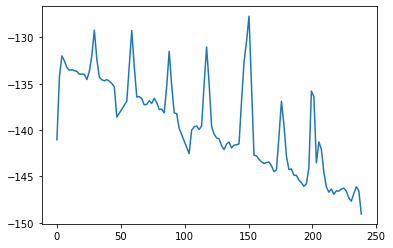

In [90]:
plt.plot(f3, x)

In [91]:

f_mn = min(f_Pxx_den_db)
f_mx = max(f_Pxx_den_db)
print(f"min: {f_mn} max: {f_mx}")

min: -202.57366909496508 max: -127.72589493148125


In [92]:
f_mn = np.min(x)
f_mx = np.max(x)
print(f"min: {f_mn} max: {f_mx}")
f_mn - (f_mn/5)

min: -149.04048581972475 max: -127.72589493148125


-119.2323886557798

In [54]:
f_Pxx_den_db

array([ -85.95437523,  -80.75503084,  -79.58331446,  -80.7161399 ,
        -82.31651589,  -83.10318092,  -83.70604095,  -84.15636626,
        -84.54727848,  -84.8667998 ,  -85.2129013 ,  -85.54156657,
        -85.85752656,  -86.173485  ,  -86.50861907,  -86.84513411,
        -87.19347682,  -87.55969054,  -87.95023496,  -88.3336663 ,
        -88.74806599,  -89.20654339,  -89.92882536,  -91.57987147,
        -94.49890351, -103.05868329, -106.37577615,  -96.74201441,
        -93.67974763,  -92.61234173,  -92.55596298,  -92.86472927,
        -93.18865326,  -93.56858851,  -93.91635546,  -94.24404567,
        -94.59661231,  -94.96384314,  -95.28952474,  -95.59640681,
        -95.92167144,  -96.23328123,  -96.53509717,  -96.8455989 ,
        -97.17831826,  -97.50082962,  -97.85276874,  -98.21292289,
        -99.13691307, -101.03818573, -105.03555036, -117.712295  ,
       -109.48120546, -103.24534966, -101.29654377, -100.39757182,
       -100.42928517, -100.5737792 , -100.76178567, -100.96321

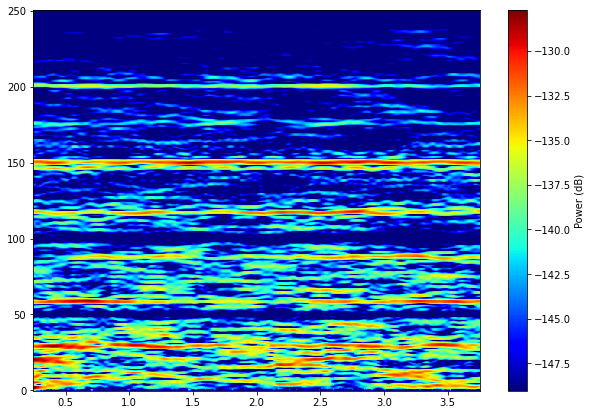

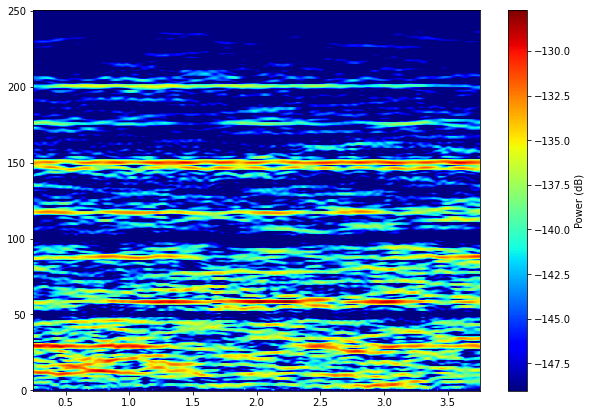

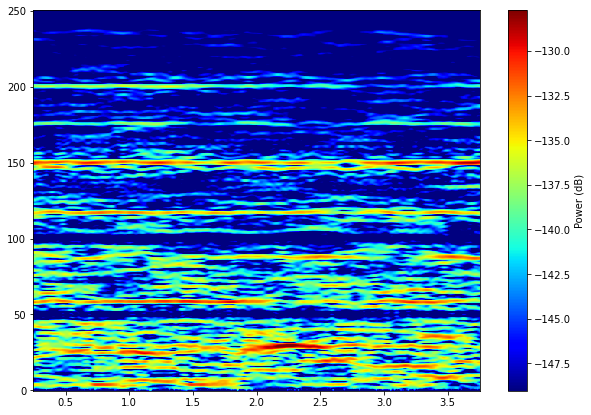

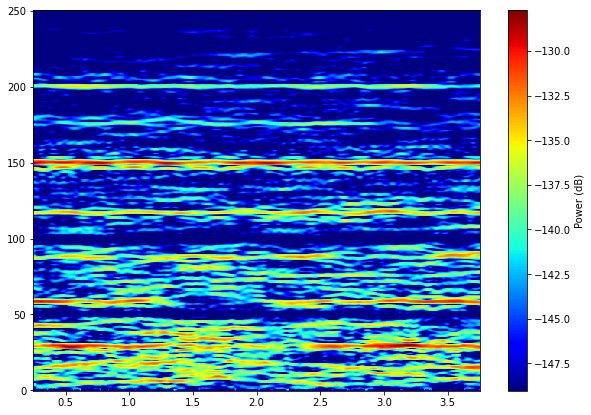

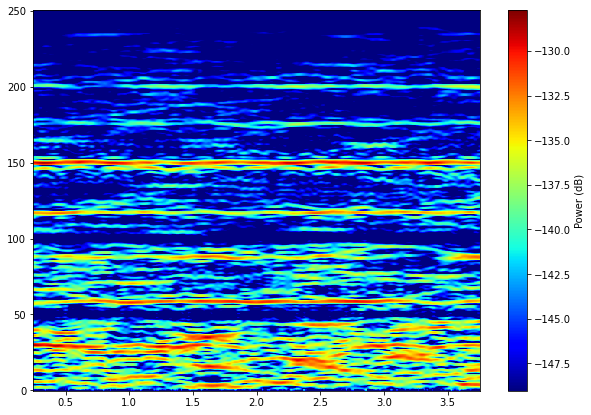

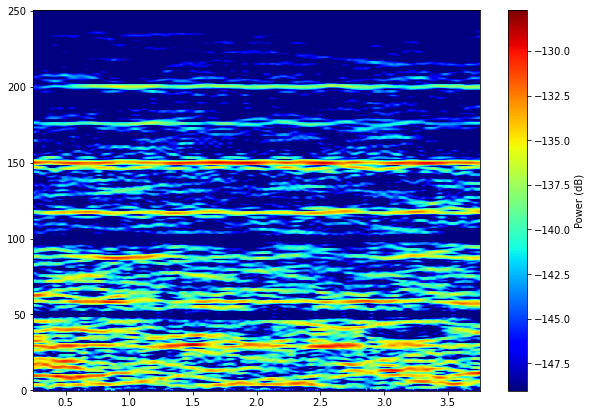

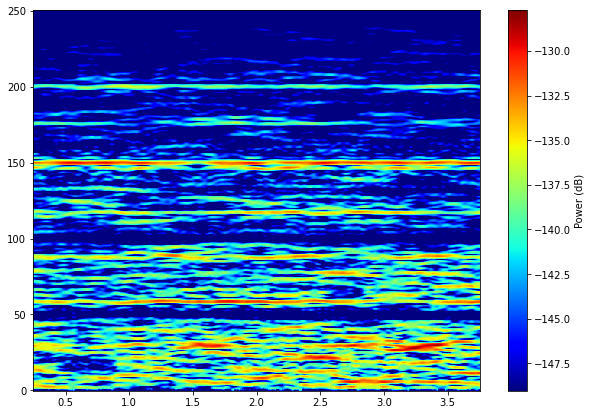

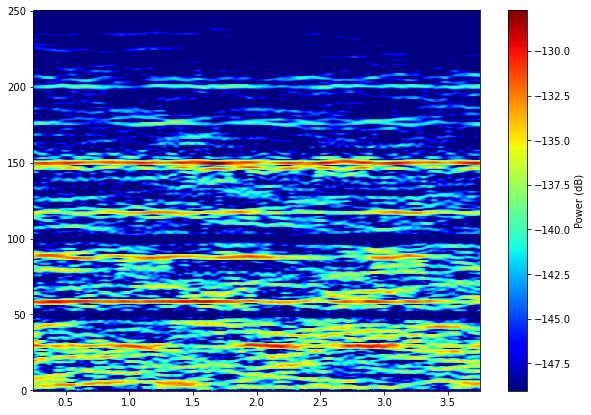

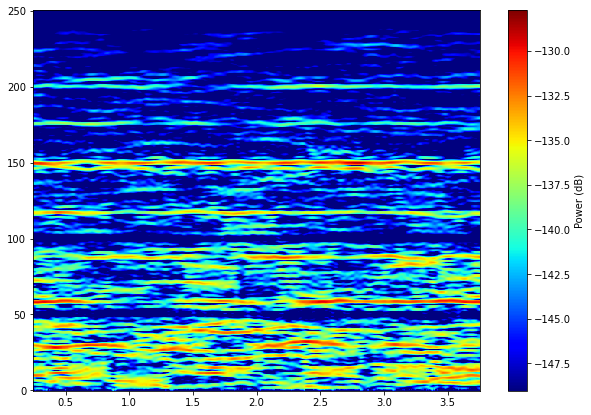

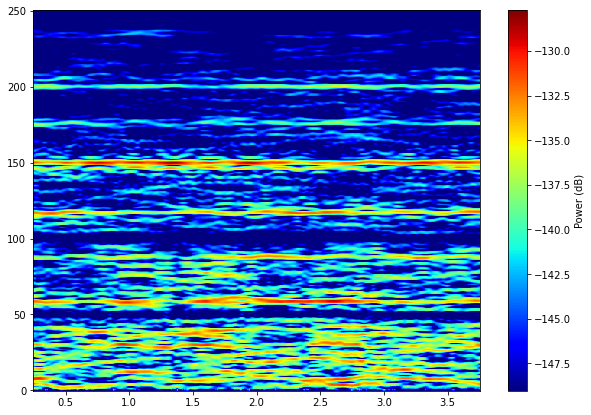

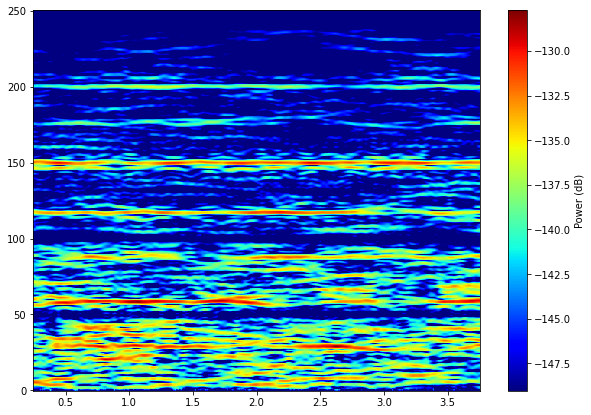

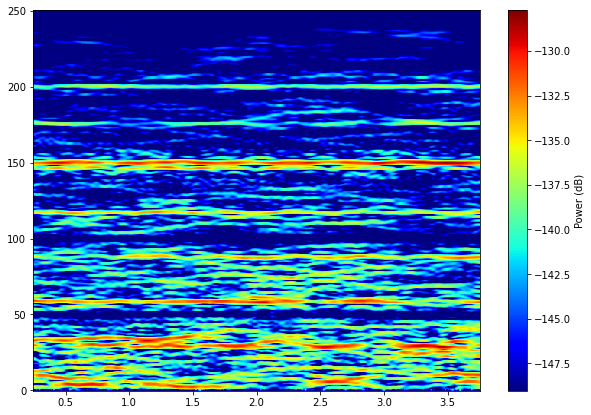

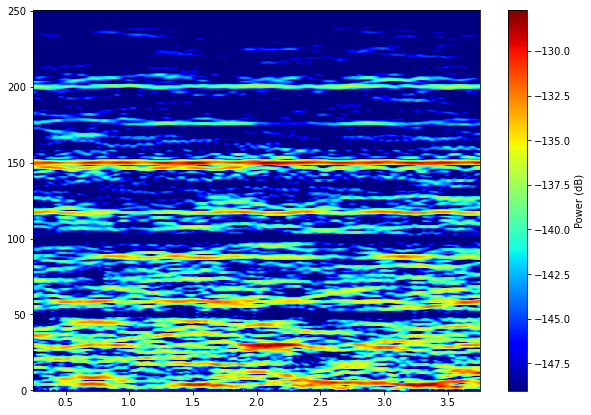

In [95]:
for f in range(0, len(filtered)-2000, 2000):
  plt.figure(figsize=(10,7), facecolor='w')
  f, t, Sxx = signal.spectrogram(filtered[f:f+2000], fs=500, nperseg=int(500/2), noverlap=int((500/2)*0.99), nfft=1024, scaling='density', return_onesided=True)
  mn = -149.9935702335341
  mx = -133.1382137560356
  normalize_color= matplotlib.colors.Normalize(vmin=f_mn, vmax=f_mx)
  Sxx = 10*np.log10(Sxx)
  plt.pcolormesh(t, f, Sxx, cmap='jet', norm=normalize_color)# Plot the result
  plt.colorbar(label='Power (dB)')

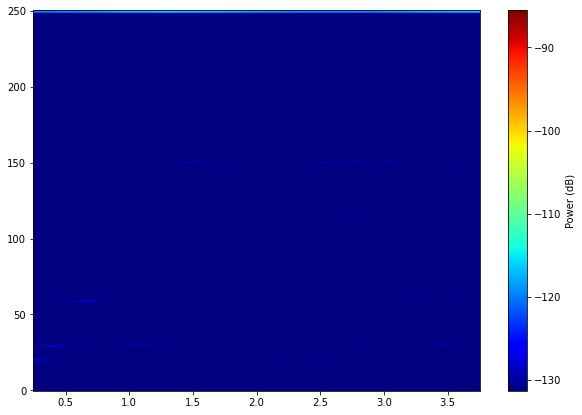

In [56]:
plt.figure(figsize=(10,7), facecolor='w')
f, t, Sxx = signal.spectrogram(np.array(sz_df['CH-1'][0:2000]), fs=500, nperseg=int(500/2), noverlap=int(500/2*0.99), nfft=1024, scaling='density', return_onesided=True)
normalize_color= matplotlib.colors.Normalize(vmin=f_mn - (f_mn/4), vmax=f_mx + (f_mx/2))
Sxx = 10*np.log10(Sxx)
plt.pcolormesh(t, f, Sxx, cmap='jet', norm=normalize_color)# Plot the result
plt.colorbar(label='Power (dB)')

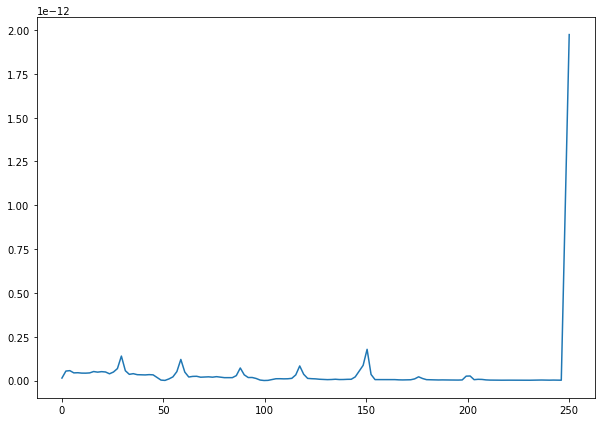

In [57]:
f = sz_df['CH-1'][0:10000]
plt.figure(figsize=(10,7), facecolor='w')
f, f_Pxx_den = signal.welch(f, fs=500, window='hanning', detrend=False,  scaling='spectrum')
plt.plot(f, f_Pxx_den)

In [58]:
filtered = apply_filter(df["CH-1"][0:100000], 500, low=True)

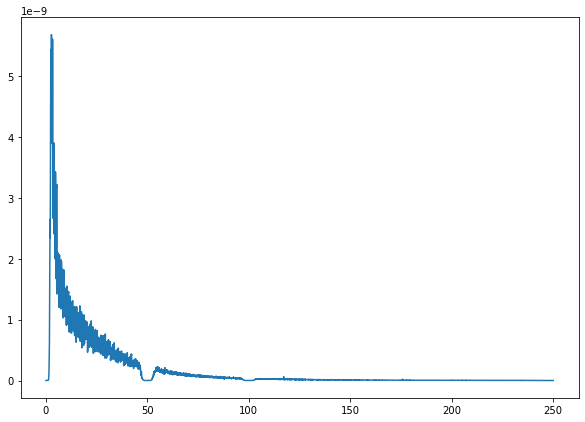

In [59]:
f, Pxx = signal.periodogram(filtered, 500)
plt.figure(figsize=(10,7), facecolor='w')
plt.plot(f, Pxx)

In [60]:
Pxx = nanpow2db(Pxx)


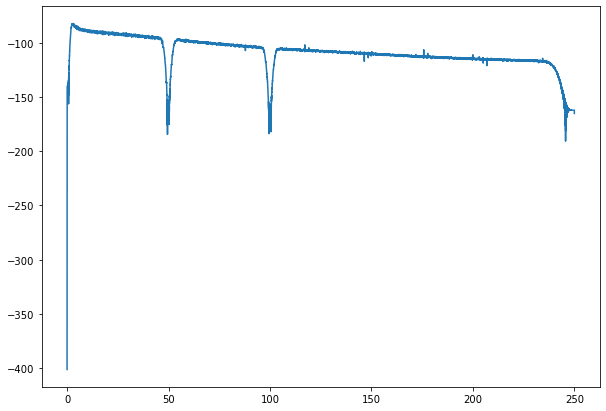

In [61]:
plt.figure(figsize=(10,7), facecolor='w')
plt.plot(f, Pxx)

In [62]:
mask = (f > 1.0)
mask.shape

(50001,)

In [63]:
f_mn = np.min(Pxx)
f_mx = np.max(Pxx)

In [64]:
x = (filtered[0:2000])

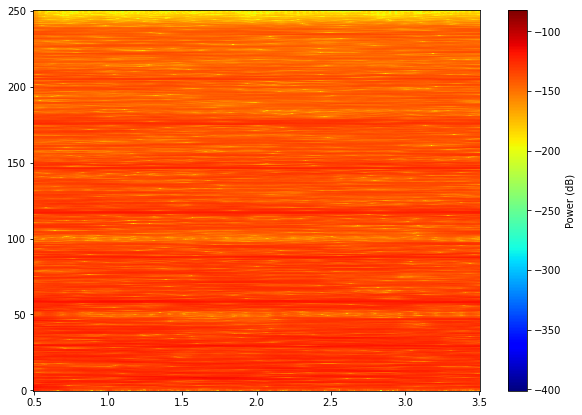

In [65]:
plt.figure(figsize=(10,7), facecolor='w')
f, t, Sxx = signal.spectrogram(filtered[0:2000], fs=500, nperseg=int(500), noverlap=int((500)*0.99), nfft=1024, scaling='density', return_onesided=True)
mn = -149.9935702335341
mx = -133.1382137560356
normalize_color= matplotlib.colors.Normalize(vmin=f_mn, vmax=f_mx)
Sxx = 10*np.log10(Sxx)
plt.pcolormesh(t, f, Sxx, cmap='jet', norm=normalize_color)# Plot the result
plt.colorbar(label='Power (dB)')